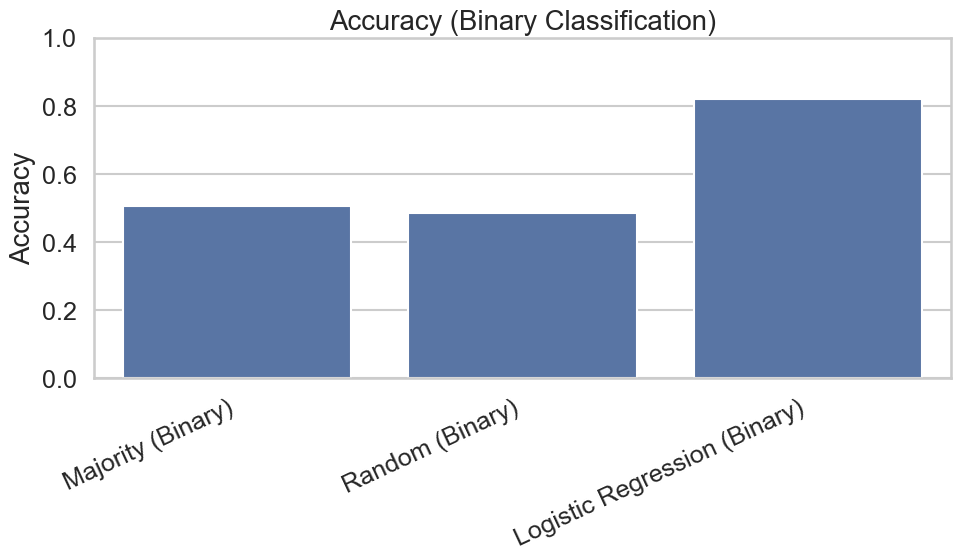

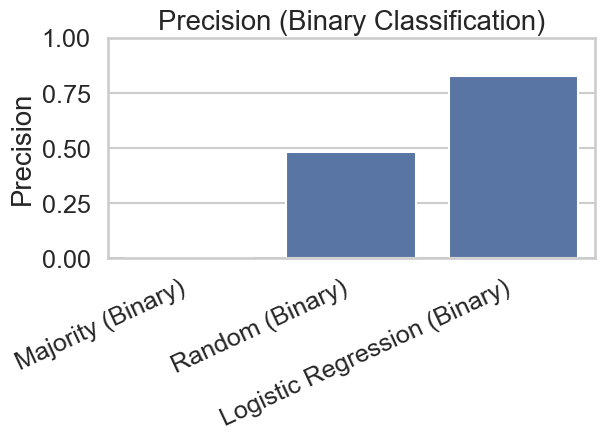

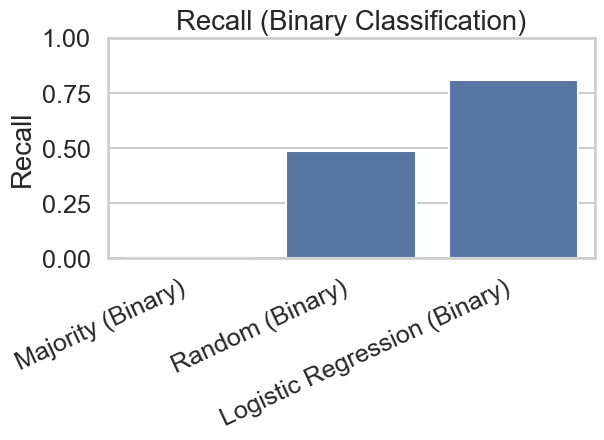

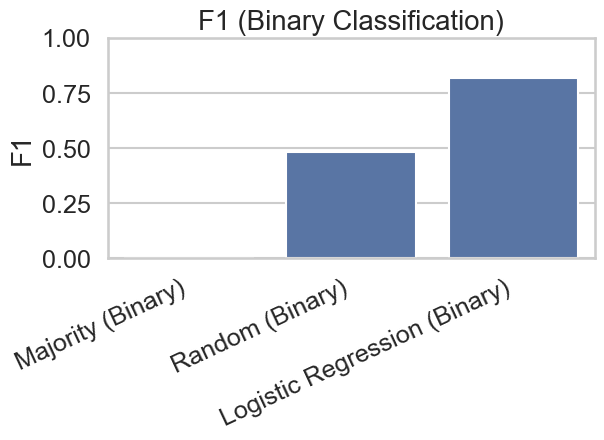

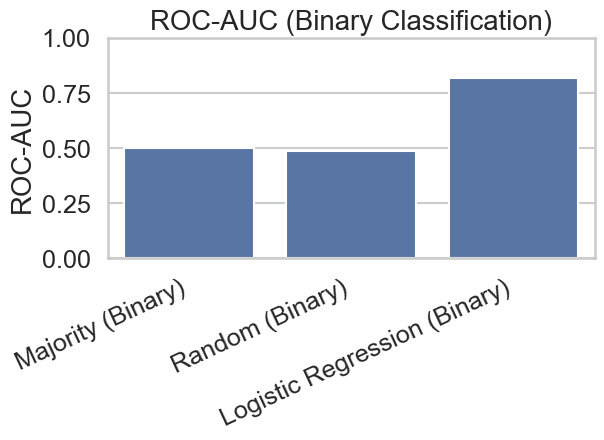

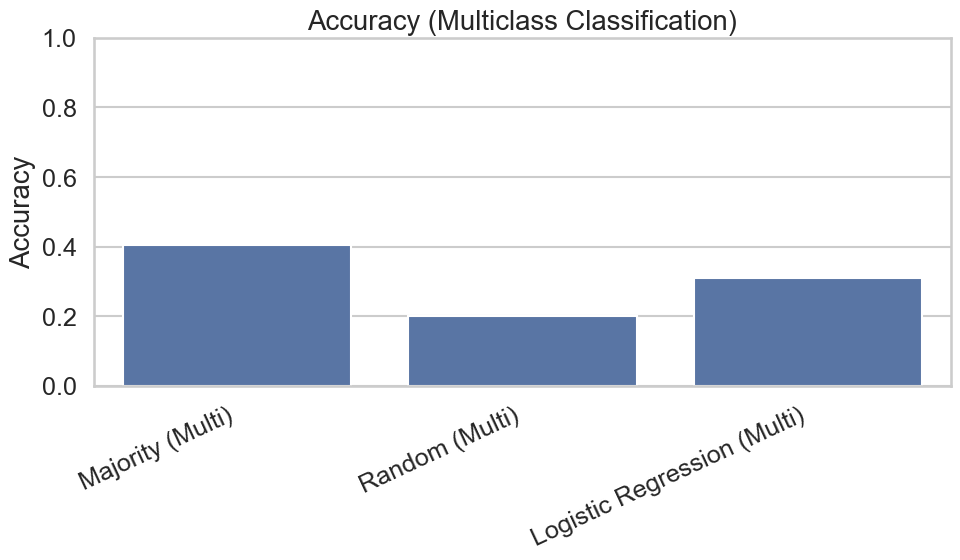

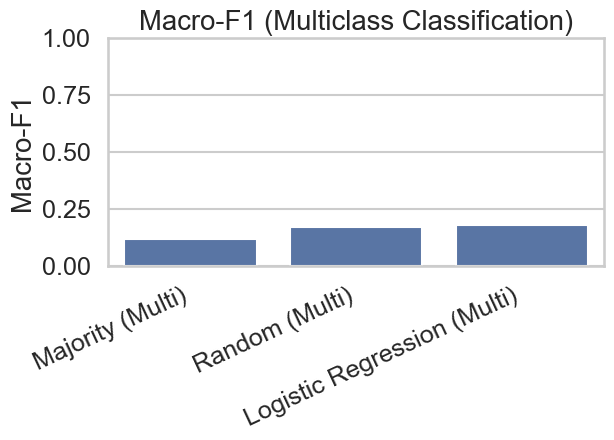

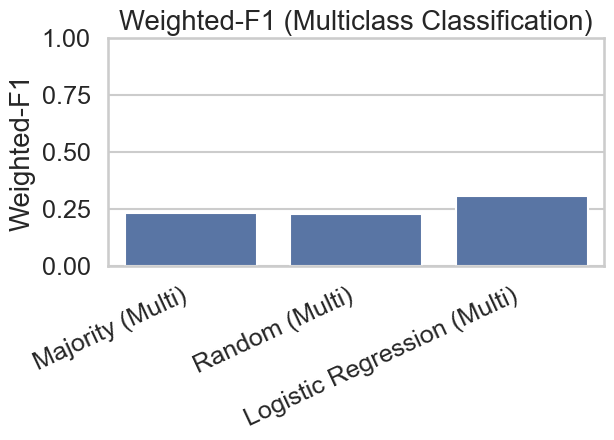

/var/folders/vs/x5my52wn5jv64c7gz3gxk3th0000gn/T/ipykernel_13765/535137865.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=multi_df, x="Model", y="MAE", palette="crest")


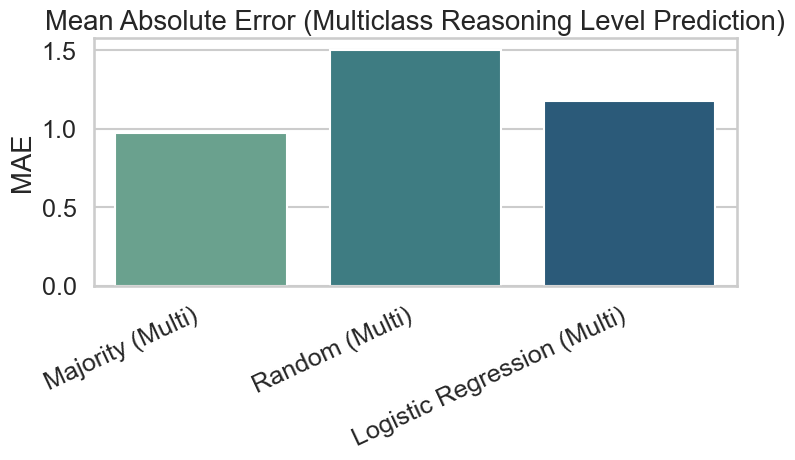


===== Combined Summary =====
                          Model  Accuracy  Precision  Recall     F1  ROC-AUC  \
0             Majority (Binary)     0.505      0.000   0.000  0.000    0.500   
1               Random (Binary)     0.485      0.480   0.485  0.482    0.485   
2  Logistic Regression (Binary)     0.820      0.825   0.808  0.816    0.820   
0              Majority (Multi)     0.405        NaN     NaN    NaN      NaN   
1                Random (Multi)     0.200        NaN     NaN    NaN      NaN   
2   Logistic Regression (Multi)     0.310        NaN     NaN    NaN      NaN   

         Task  Macro-F1  Weighted-F1    MAE  
0      Binary       NaN          NaN    NaN  
1      Binary       NaN          NaN    NaN  
2      Binary       NaN          NaN    NaN  
0  Multiclass     0.115        0.233  0.975  
1  Multiclass     0.169        0.227  1.505  
2  Multiclass     0.180        0.308  1.175  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ====== 1. Load Results from Excel ======
binary_df = pd.read_excel("evaluation_results.xlsx", sheet_name="Binary")
multi_df = pd.read_excel("evaluation_results.xlsx", sheet_name="Multi-class")

sns.set(style="whitegrid", context="talk", font_scale=1.1)

# ====== 2. Binary Classification Metrics ======
metrics_bin = ["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"]

plt.figure(figsize=(10, 6))
for metric in metrics_bin:
    sns.barplot(data=binary_df, x="Model", y=metric)
    plt.title(f"{metric} (Binary Classification)")
    plt.ylabel(metric)
    plt.xlabel("")
    plt.ylim(0, 1)
    plt.xticks(rotation=25, ha='right')
    plt.tight_layout()
    plt.show()

# ====== 3. Multiclass Metrics ======
metrics_multi = ["Accuracy", "Macro-F1", "Weighted-F1"]

plt.figure(figsize=(10, 6))
for metric in metrics_multi:
    sns.barplot(data=multi_df, x="Model", y=metric)
    plt.title(f"{metric} (Multiclass Classification)")
    plt.ylabel(metric)
    plt.xlabel("")
    plt.ylim(0, 1)
    plt.xticks(rotation=25, ha='right')
    plt.tight_layout()
    plt.show()

# ====== 4. Mean Absolute Error (Multiclass) ======
plt.figure(figsize=(8, 5))
sns.barplot(data=multi_df, x="Model", y="MAE", palette="crest")
plt.title("Mean Absolute Error (Multiclass Reasoning Level Prediction)")
plt.ylabel("MAE")
plt.xlabel("")
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

# ====== 5. Combined Summary Table (Optional Printout) ======
summary = pd.concat([binary_df.assign(Task="Binary"), multi_df.assign(Task="Multiclass")])
print("\n===== Combined Summary =====")
print(summary.round(3))
